# Actividad N° 07: API para Water Potability

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Realizar un modelo basado en los datos de *water_potability.csv* para apificarlo.

# Código

## Importación de datos y librerías

In [50]:
import pandas as pd
import pickle
import seaborn as sns

from funpymodeling.exploratory import status
from matplotlib import pyplot as plt

In [51]:
data = pd.read_csv("water_potability.csv", sep=",")
data.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


## Análisis inicial

In [52]:
print(f"Registros del dataset: {data.shape[0]}")
status(data)

Registros del dataset: 3276


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ph,491,0.149878,1,0.000305,2785,float64
1,Hardness,0,0.000000,0,0.000000,3276,float64
2,Solids,0,0.000000,0,0.000000,3276,float64
3,Chloramines,0,0.000000,0,0.000000,3276,float64
4,Sulfate,781,0.238400,0,0.000000,2495,float64
5,Conductivity,0,0.000000,0,0.000000,3276,float64
6,Organic_carbon,0,0.000000,0,0.000000,3276,float64
7,Trihalomethanes,162,0.049451,0,0.000000,3114,float64
8,Turbidity,0,0.000000,0,0.000000,3276,float64
9,Potability,0,0.000000,1998,0.609890,2,int64


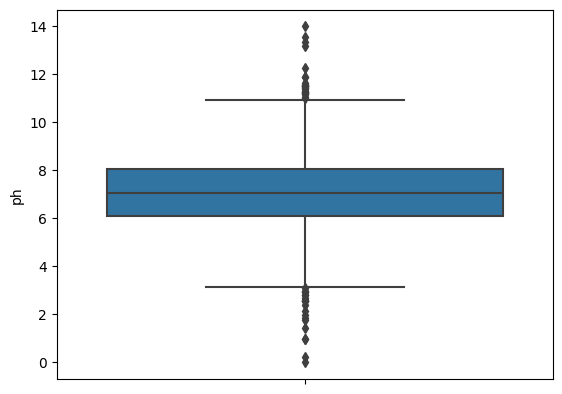

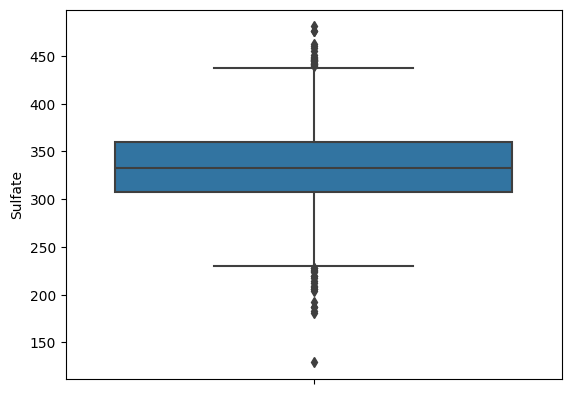

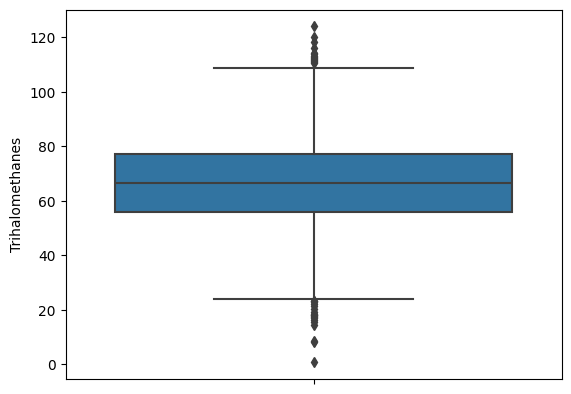

In [ ]:
columns_to_be_binned = ["ph", "Sulfate", "Trihalomethanes"]
for col in columns_to_be_binned:
    sns.boxplot(data=data, y=col)
    plt.show()

- Discreticen por igual frecuencia e igual rango las columnas: `ph`, `Sulfate` y `Trihalomethanes`.
  <br>Usen `duplicates='drop', retbins=True` para posteriormente guardarlas. 
  <br>Y nombrarlas como `saved_bins_ph`, `saved_bins_sulfate` y `saved_bins_trihalomethanes`.

- Y guarden las discretizaciones:

In [ ]:
for col in columns_to_be_binned:
    variable_name = "saved_bins_" + col.lower()
    
    data[col + "_disc"], bins = pd.qcut(data[col], q=8, duplicates="drop", retbins=True)

    with open("saved_bins_" + col.lower() + '.pickle', 'wb') as handle:
        pickle.dump(bins, handle, protocol=pickle.HIGHEST_PROTOCOL)

    print(data[col + "_disc"].value_counts())

ph_disc
(-0.001, 5.343]    349
(5.343, 6.093]     348
(6.093, 6.604]     348
(6.604, 7.037]     348
(7.037, 7.53]      348
(7.53, 8.062]      348
(8.062, 8.86]      348
(8.86, 14.0]       348
Name: count, dtype: int64
Sulfate_disc
(128.999, 288.514]    312
(288.514, 307.699]    312
(307.699, 321.413]    312
(321.413, 333.074]    312
(344.859, 359.95]     312
(359.95, 379.82]      312
(379.82, 481.031]     312
(333.074, 344.859]    311
Name: count, dtype: int64
Trihalomethanes_disc
(0.737, 48.15]      390
(84.578, 124.0]     390
(48.15, 55.845]     389
(55.845, 61.664]    389
(61.664, 66.622]    389
(66.622, 71.663]    389
(71.663, 77.337]    389
(77.337, 84.578]    389
Name: count, dtype: int64


- Agregar categoría `desconocido` a los valores NaN de las 3 columnas previamente mencionadas.

- Hacer un `get dummies`.

- Su variable target o de interés a clasificar es `Potability`.

- Recuerden comentar y NO utilizar la siguiente celda:
    ```
    data_x = data_x.values
    data_y = data_y.values
    ``` 

- Utilicen el 30% del dataset para test.

- Para el Random Forest consideren los parámetros `n_estimators = 1000` y `random_state = 99`

- Guarden el modelo con el nombre `rf.pkl`.

- Guarden el nombre de las columnas
  ```
    import pickle

    # Guardamos las columnas x (sin Potability)
    with open('categories_ohe.pickle', 'wb') as handle:
        pickle.dump(data_x.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)
  ```